#Project Module 5: Interpolation
#CPSMA 4413-01 Dr. Jacob's Numerical Methods
Reed Barker and Seth Jensen

In [65]:
import matplotlib.pyplot as plt
import numpy as np
# Methods

def gJEquation(a, b, c, d):
  return a - ( b * (c / d) )

def gaussJordan(arr):

  showResults = False #@param {type:"boolean"}

  #Stage 1 Creating an upper triangular matrix
  val1 = 1

  for i in range (len(arr)):
    i_num = arr[i][i]

    for j in range (val1, len(arr)):
      j_num = arr[j][i]

      for k in range (len(arr[0])):
        arr[j][k] = gJEquation(arr[j][k], arr[i][k], j_num, i_num)

    val1 += 1

  if (showResults):
    for row in arr:
      print(row)
    print()

  #Stage 2 Transform rows for the Diagonal Matrix location values to be 1
  for i in range(len(arr)):
    i_num = arr[i][i]

    for j in range(len(arr[0])):
      arr[i][j] /= i_num
      #print(arr[i][j], i_num)

  if (showResults):
    for row in arr:
      print(row)
    print()

  #Stage 3 Transform rows to create a Diagonal Matrix
  val1 = len(arr)

  for i in range (1, len(arr)):
    i_num = arr[i][i]

    for j in range (i):
      j_num = arr[j][i]

      for k in range (len(arr[0])):
        arr[j][k] = gJEquation(arr[j][k], arr[i][k], j_num, i_num)

  val1 -= 1

  if (showResults):
    for row in arr:
      print(row)
    print()

  return arr

def sysOfEqAnswers(arr):
  tempArray = []

  gaussJordan(arr)

  for i in range(len(arr)):
    tempArray.append(arr[i][-1])

  return tempArray

| x | f(x) |
|---------|----------|
| 2   | 1.3409207818930033  |
| 4   | 2.702289094650206  |
| 8   | 3.048482510288066  |
| 12  | 3.0243055555555554  |
| 14  | 4.107896090534981  |
| 15  | 5.555555555555555  |


---


Base:  
f(x) = x<sup>3</sup> - x/3<sup>2</sup> - x + 4

Transformed:  
f(x) = ((x/6) - 1.5)<sup>3</sup> - ((x/18) - 1.5)<sup>2</sup> - ((x/6) - 1.5) + 4

---

Base:  
f(x) = a<sub>0</sub> + a<sub>1</sub>x + a<sub>2</sub>x<sup>2</sup> + a<sub>3</sub>x<sup>3</sup>  

f(2) =  a<sub>0</sub> + a<sub>1</sub>(2) + a<sub>2</sub>(2)<sup>2</sup> + a<sub>3</sub>(2)<sup>3</sup> + a<sub>4</sub>(2)<sup>4</sup> + a<sub>5</sub>(2)<sup>5</sup> = 1.3409207818930033  
f(4) =  a<sub>0</sub> + a<sub>1</sub>(4) + a<sub>2</sub>(4)<sup>2</sup> + a<sub>3</sub>(4)<sup>3</sup> + a<sub>4</sub>(4)<sup>4</sup> + a<sub>5</sub>(4)<sup>5</sup> = 2.702289094650206   
f(8) =  a<sub>0</sub> + a<sub>1</sub>(8) + a<sub>2</sub>(8)<sup>2</sup> + a<sub>3</sub>(8)<sup>3</sup> + a<sub>4</sub>(8)<sup>4</sup> + a<sub>5</sub>(8)<sup>5</sup> = 3.048482510288066   
f(12) = a<sub>0</sub> + a<sub>1</sub>(12) + a<sub>2</sub>(12)<sup>2</sup> + a<sub>3</sub>(12)<sup>3</sup> + a<sub>4</sub>(12)<sup>4</sup> + a<sub>5</sub>(12)<sup>5</sup> = 3.0243055555555554  
f(14) = a<sub>0</sub> + a<sub>1</sub>(14) + a<sub>2</sub>(14)<sup>2</sup> + a<sub>3</sub>(14)<sup>3</sup> + a<sub>4</sub>(14)<sup>4</sup> + a<sub>5</sub>(14)<sup>5</sup> = 4.107896090534981   
f(15) = a<sub>0</sub> + a<sub>1</sub>(15) + a<sub>2</sub>(15)<sup>2</sup> + a<sub>3</sub>(15)<sup>3</sup> + a<sub>4</sub>(15)<sup>4</sup> + a<sub>5</sub>(15)<sup>5</sup> = 5.555555555555555   


---


$
\begin{matrix}
\left[ \begin{array}{cccc}
1 & 2 & 4 & 8 & 16 & 32\\
1 & 4 & 16 & 64 & 256 & 1024\\
1 & 8 & 64 & 512 & 4096 & 32768\\
1 & 12 & 144 & 1728 & 20736 & 248832\\
1 & 14 & 196 & 2744 & 38416 & 537824\\
1 & 15 & 225 & 3375 & 50625 & 759375\\
\end{array}
\right]
\end{matrix}
\begin{matrix}
\left[ \begin{array}{cccc}
a_0\\
a_1\\
a_2\\
a_3\\
\end{array}
\right]
\end{matrix} =
\begin{matrix}
\left[ \begin{array}{cccc}
1.3409207818930033 \\
2.702289094650206 \\
3.048482510288066 \\
3.0243055555555554 \\
4.107896090534981 \\
5.555555555555555 \\
\end{array}
\right]
\end{matrix}
$



In [73]:
import numpy as np

array1 = []

fOFx_equation = "((x/6) - 1.5)**5 + ((x/6) - 1.5)**4 + ((x/6) - 1.5)**3 - ((x/18) - 1.5)**2 - ((x/6) - 1.5) + 5"

def f(x): # f(x) function
  return eval(fOFx_equation) # runs the string equation with input as the x

xVals = [2, 4, 8, 12, 14, 15]
fOFxVals = [f(xVals[0]), f(xVals[1]), f(xVals[2]), f(xVals[3]), f(xVals[4]), f(xVals[5])]

print("Matrix:")
for i in range(6):
    row = []
    for j in range(7):
        if j < 6:
            row.append(xVals[i] ** j) # add xVals raised to the power of j to the row
        else:
            row.append(fOFxVals[i]) # add the corresponding fOFxVal to the row
    array1.append(row) # append the row to the array

    print(array1[i])

Matrix
[1, 2, 4, 8, 16, 32, 2.3409207818930033]
[1, 4, 16, 64, 256, 1024, 3.702289094650206]
[1, 8, 64, 512, 4096, 32768, 4.048482510288066]
[1, 12, 144, 1728, 20736, 248832, 4.024305555555555]
[1, 14, 196, 2744, 38416, 537824, 5.107896090534981]
[1, 15, 225, 3375, 50625, 759375, 6.555555555555555]


[-1.6562500000000129, 3.0937500000000115, -0.6905864197530902, 0.08101851851851903, -0.005015432098765464, 0.00012860082304526823]
3.222222222222222
3.942386831275718
4.045138888888882
3.9468878600823025
4.353909465020571


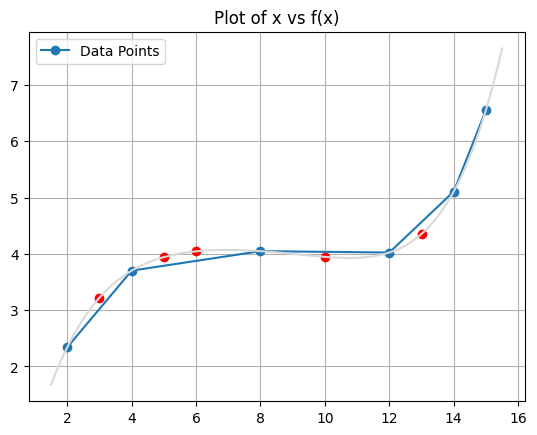

In [67]:
points1 = [3, 5, 6, 10, 13]
inputNum = 0

#---------------------------------------------------------------------

arr = sysOfEqAnswers(array1)
print(arr)

for i in range(len(points1)):
  inputNum = points1[i]
  maths = arr[0] + arr[1]*inputNum + arr[2]*inputNum**2 + arr[3]*inputNum**3 + arr[4]*inputNum**4 + arr[5]*inputNum**5
  
  print(maths)

  plt.plot(inputNum, maths, 'o-', color="red")

#---------------------------------------------------------------------





plt.plot(xVals, fOFxVals, 'o-', label='Data Points')
plt.title('Plot of x vs f(x)')
plt.legend()
plt.grid(True)

fOFx_equation = "((x/6) - 1.5)**5 + ((x/6) - 1.5)**4 + ((x/6) - 1.5)**3 - ((x/18) - 1.5)**2 - ((x/6) - 1.5) + 5"

def f(x):
    return eval(fOFx_equation)

# Define the x range for the plot
x = np.linspace(1.5, 15.5, 100)

# Plot the function over the x range
plt.plot(x, f(x), color="#D9D9D9")

plt.show()





| t(s) | v(t) |
|---------|----------|
| 0        |  0  |
| 10       |  227.04  |
| 15       |  362.78  |
| 20       |  517.35  |
| 22.5     |  602.97 |
| 30       |  901.67 |

---

$
y = mx + b  
$

$
m = \frac{y_2 - y_1}{x_2 - x_1}
$

$
y = \frac{y_2 - y_1}{x_2 - x_1}x + b  
$

$
f(x) = f(x_1) + \frac{f(x_2) - f(x_1)}{x_2 - x_1}(x - x_1)
$

(15, 362.78), (20, 517.35)

$
f(x) = 362.78 + \frac{517.35 - 362.78}{20 - 15}(x - 15)
$

$
f(16) = 362.78 + \frac{517.35 - 362.78}{20 - 15}(16 - 15)
$

$
f(16) = 393.7
$

6.193640689300412


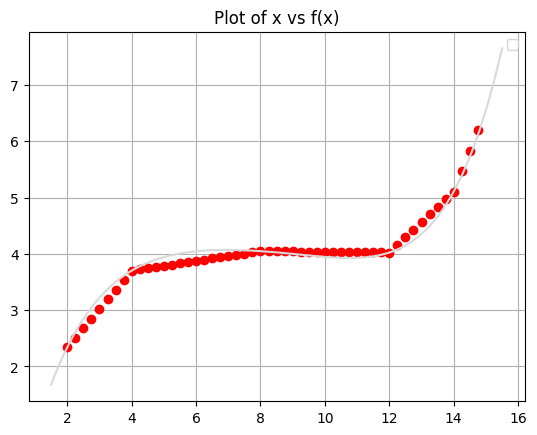

In [68]:

def methodWow(x1, fOFx1, x2, fOFx2, x):
  return( fOFx1 + ( (fOFx2 - fOFx1) / (x2 - x1) ) * (x - x1) )

for i in range(60):
  inputNum = i*.25
  for i in range(len(xVals)-1):
    if (xVals[i] <= inputNum and xVals[i+1] >= inputNum):
      result = methodWow(xVals[i], fOFxVals[i], xVals[i+1], fOFxVals[i+1], inputNum)
      plt.plot(inputNum, result, 'ro') # 'ro' for red circles
      break

print(result)

#----------------------------------------------------------------

# Define the x range for the plot
x = np.linspace(1.5, 15.5, 100)
# Plot the function over the x range
plt.plot(x, f(x), color="#D9D9D9")

plt.title('Plot of x vs f(x)')
plt.legend()
plt.grid(True)
plt.show()